<a href="https://colab.research.google.com/github/nescoba/DIP/blob/main/ml1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Recurrent Neural Network to Predict Values of the Series

## Importing data

In [174]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set()

In [177]:
import tensorflow as tf 
from tensorflow import keras

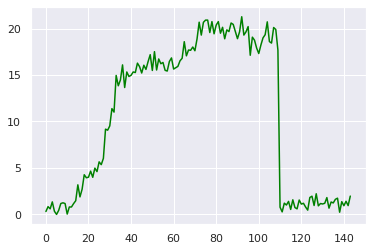

In [175]:
dfg = pd.read_csv('10G.csv', header=None)

plt.plot(dfg[1000], color='green')

The data contains a lot of NANs. So we input 0's instead of those NANs:

In [176]:
dfg = dfg.fillna(value=0)

## Constructing the model

The model contains two layers of 20 LSTM cells. And then a dense layer with 10 cells to predict the last 10 values of the series. 

In [178]:
model = keras.models.Sequential([
 keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
 keras.layers.LSTM(20),
 keras.layers.Dense(10)
])

def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss="mse", optimizer=optimizer, metrics=[last_time_step_mse])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### Wrangling the data to train the model 

In [180]:
x = (dfg.iloc[:90, :]).T
y = (dfg.iloc[90:100, :]).T

In [183]:
# # x = np.empty(shape=(dfg.shape[1], cutoff + 1))
# # y = np.empty(shape=(dfg.shape[1], cutoff + 1, 10))

# x = np.empty(shape=(1, cutoff+1))
# y = np.empty(shape=(1, cutoff + 1, 10))

# for i in range(dfg.shape[1]):
#     # try:
#     x_i = dfg[i][:(cutoff + 1)]
#     x = np.vstack((x, x_i))
#     y_i = np.empty(shape = (10,1))
#     for step in range(cutoff + 1):
#         y_i_step = dfg[i][step:(step+10)]
#         y_i_step = y_i_step[..., np.newaxis]
#         y_i = np.hstack((y_i, y_i_step))
#     y = np.vstack((y, y_i))
#     # except:
#     #     print(i)

In [184]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=123456789)
xtrain, xvalid, ytrain, yvalid = train_test_split(xtrain,ytrain, test_size=0.2, random_state=123456789)

In [185]:
# xtrain = x[:2080]
# xvalid = x[2080:2600]
# xtest = x[2600:3267]

# ytrain = y[:2080]
# yvalid = y[2080:2600]
# ytest = y[2600:3267]

## Training the model

In [187]:
history = model.fit(xtrain, ytrain, epochs=30, validation_data=(xvalid, yvalid))


Epoch 1/30
232/232 [==============================] - 19s 66ms/step - loss: 198.3599 - last_time_step_mse: 204.8635 - val_loss: 91.4895 - val_last_time_step_mse: 112.6888
Epoch 2/30
232/232 [==============================] - 14s 62ms/step - loss: 73.6290 - last_time_step_mse: 93.3668 - val_loss: 60.7423 - val_last_time_step_mse: 85.8889
Epoch 3/30
232/232 [==============================] - 14s 62ms/step - loss: 55.0727 - last_time_step_mse: 76.1949 - val_loss: 52.1045 - val_last_time_step_mse: 79.2965
Epoch 4/30
232/232 [==============================] - 15s 63ms/step - loss: 47.8629 - last_time_step_mse: 69.1104 - val_loss: 45.7942 - val_last_time_step_mse: 73.3695
Epoch 5/30
232/232 [==============================] - 14s 62ms/step - loss: 43.8101 - last_time_step_mse: 64.8447 - val_loss: 44.2794 - val_last_time_step_mse: 70.9278
Epoch 6/30
232/232 [==============================] - 14s 62ms/step - loss: 40.4391 - last_time_step_mse: 61.0177 - val_loss: 43.4421 - val_last_time_step_ms

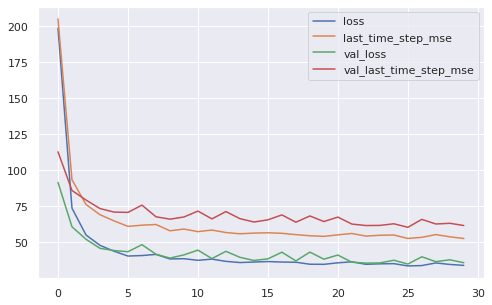

In [188]:
pd.DataFrame(history.history).plot(figsize=(8, 5))

## Testing the model 

In [189]:
ypred = model.predict(xtest)

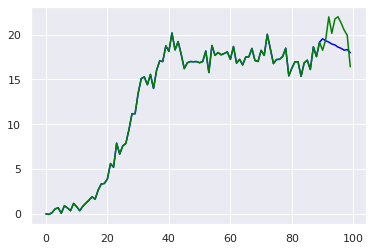

In [207]:
n = 200
x_n = np.hstack((xtest.iloc[n], ytest.iloc[n]))
y_n = np.hstack((xtest.iloc[n], ypred[n]))
plt.plot(y_n, color='blue')
plt.plot(x_n, color='green')
